In [1]:
!pip install chart_studio
!pip install cufflinks
!pip install -U kaleido
!pip install pvlib

In [2]:
import pvlib
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio
%matplotlib inline

In [3]:
studi_global=pd.read_csv('nordhausen_global.csv',skiprows=8,nrows=8784,
                     index_col=0)

In [4]:
studi_components=pd.read_csv('nordhausen_components.csv',skiprows=8,nrows=8784,
                     index_col=0)

In [5]:
poa_studi=pd.DataFrame(columns=['poa_global','poa_direct','poa_diffuse','temp_air','wind_speed'],
                       index=studi_global.index)

In [6]:
poa_studi['poa_global']=studi_global['G(i)']
poa_studi['poa_direct']=studi_components['Gb(i)']
poa_studi['poa_diffuse']=studi_components['Gd(i)']+studi_components['Gr(i)']
poa_studi['temp_air']=studi_components['T2m']
poa_studi['wind_speed']=studi_components['WS10m']

In [7]:
poa_studi.index=pd.to_datetime(poa_studi.index,format='%Y%m%d:%H%M')

In [8]:
location=Location(latitude=51.4984,
                  longitude=10.7931,
                  tz='Europe/Berlin',
                  altitude=202,
                  name='Studienkolleg')

In [9]:
cec=pvlib.pvsystem.retrieve_sam('CECmod')
cec_inverters=pvlib.pvsystem.retrieve_sam('CECInverter')

In [10]:
module=cec['Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370']
inverter=cec_inverters['ABB__TRIO_27_6_TL_OUTD_S1A_US_480_A__480V_']
inverter_1=cec_inverters['Advanced_Energy_Industries__AE_3TL_12_10__480V_']
temperature_parameters=TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [11]:
cec['Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370']

Technology           Multi-c-Si
Bifacial                      0
STC                    370.0012
PTC                       340.6
A_c                       1.946
Length                     1.97
Width                     0.988
N_s                          72
I_sc_ref                   9.89
V_oc_ref                  48.28
I_mp_ref                   9.41
V_mp_ref                  39.32
alpha_sc               0.003758
beta_oc               -0.139529
T_NOCT                     45.5
a_ref                   1.86472
I_L_ref                9.997571
I_o_ref                     0.0
R_s                     0.35409
R_sh_ref             407.904602
Adjust                 8.079701
gamma_r                  -0.394
BIPV                          N
Version       SAM 2018.11.11 r2
Date                   1/3/2019
Name: Hanwha_Q_CELLS_Q_PEAK_L_G4_2_370, dtype: object

In [12]:
cec_inverters['ABB__TRIO_27_6_TL_OUTD_S1A_US_480_A__480V_']

Vac                          480
Pso                    92.134544
Paco                     27600.0
Pdco                28199.173828
Vdco                       715.0
C0                          -0.0
C1                     -0.000031
C2                     -0.001336
C3                     -0.001753
Pnt                         8.28
Vdcmax                     800.0
Idcmax                 39.439404
Mppt_low                   520.0
Mppt_high                  800.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__TRIO_27_6_TL_OUTD_S1A_US_480_A__480V_, dtype: object

In [13]:
cec_inverters['Advanced_Energy_Industries__AE_3TL_12_6__480V_']

Vac                          480
Pso                     63.25692
Paco                     12000.0
Pdco                12274.302734
Vdco                       720.0
C0                          -0.0
C1                     -0.000012
C2                     -0.000531
C3                     -0.005697
Pnt                          3.6
Vdcmax                     900.0
Idcmax                 17.047643
Mppt_low                   450.0
Mppt_high                  900.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: Advanced_Energy_Industries__AE_3TL_12_6__480V_, dtype: object

In [14]:
cec_inverters['ABB__UNO_2_0_I_OUTD_S_US__208V_']

Vac                          208
Pso                      25.9825
Paco                      2000.0
Pdco                 2089.758545
Vdco                       330.0
C0                     -0.000013
C1                     -0.000029
C2                      0.001223
C3                     -0.001381
Pnt                          0.4
Vdcmax                     416.0
Idcmax                  6.332602
Mppt_low                   100.0
Mppt_high                  416.0
CEC_Date                     NaN
CEC_Type     Utility Interactive
Name: ABB__UNO_2_0_I_OUTD_S_US__208V_, dtype: object

In [15]:
cec_inverters['ABB__TRIO_60_0_TL_OUTD_US_480__480V_']

Vac                          480
Pso                   144.161957
Paco                     60000.0
Pdco                61110.542969
Vdco                       720.0
C0                          -0.0
C1                      -0.00002
C2                      0.000759
C3                     -0.000953
Pnt                          0.8
Vdcmax                     800.0
Idcmax                 84.875754
Mppt_low                   570.0
Mppt_high                  800.0
CEC_Date              10/15/2018
CEC_Type     Utility Interactive
Name: ABB__TRIO_60_0_TL_OUTD_US_480__480V_, dtype: object

In [16]:
system=PVSystem(surface_tilt=25,surface_azimuth=180,
                module_parameters=module,
                inverter_parameters=inverter,
                temperature_model_parameters=temperature_parameters,
                modules_per_string=8,strings_per_inverter=8)

In [17]:
clear

In [18]:
modelchain=ModelChain(system,location,aoi_model="physical",spectral_model="no_loss")
modelchain

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: sandia_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

In [19]:
clear

In [20]:
clear

<Axes: xlabel='time'>

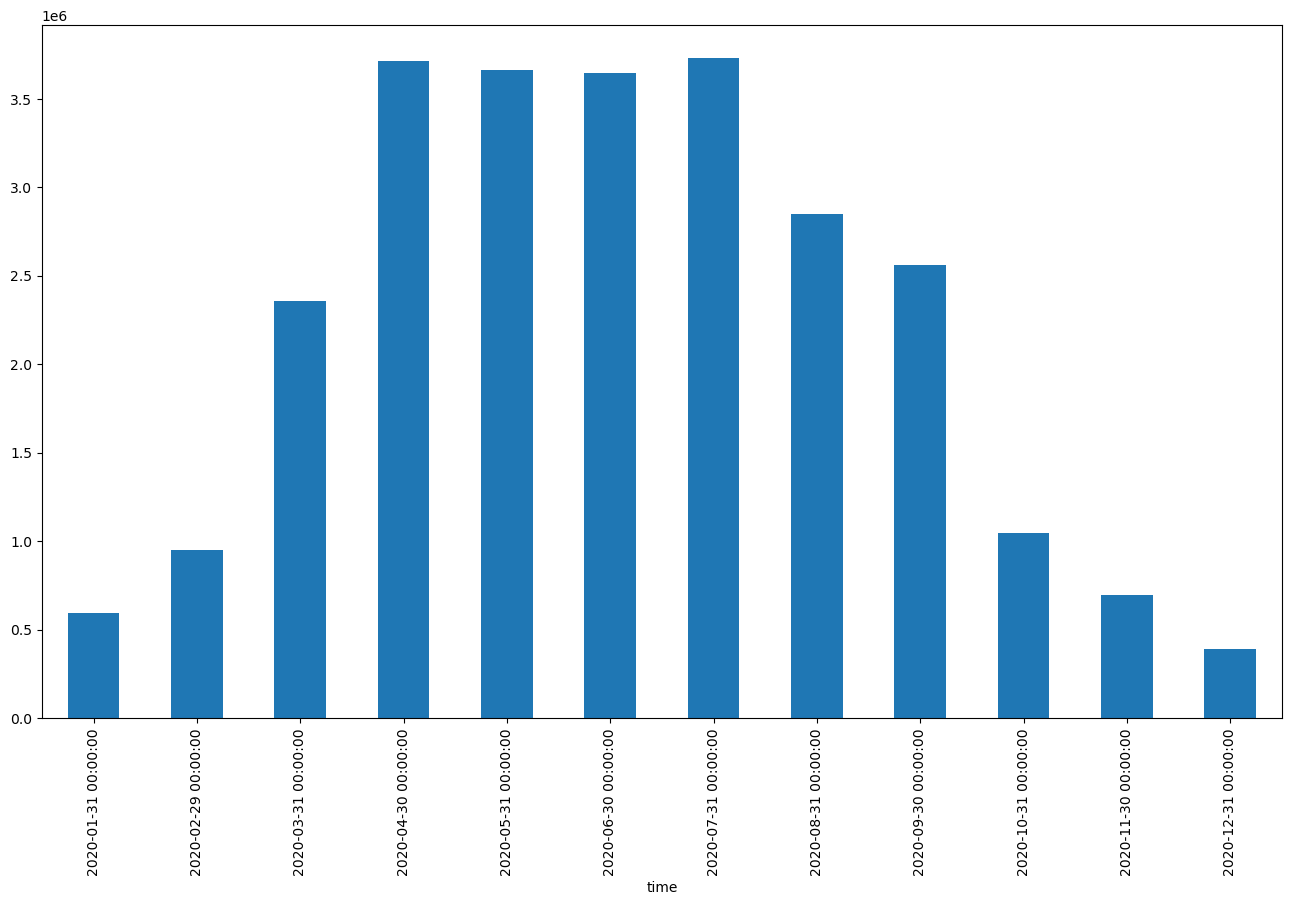

In [21]:
modelchain.run_model_from_poa(poa_studi)
modelchain.results.ac.resample('M').sum().plot(kind='bar',figsize=(16,9))

In [22]:
modelchain.results.ac.resample('M').sum().sum()

26201425.517607562

In [24]:
26201425.517607562/1000

26201.425517607564

In [29]:
modelchain.results.dc.resample('m').sum().sum()

i_sc    9.428854e+04
v_oc    1.529001e+06
i_mp    8.885943e+04
v_mp    1.307434e+06
p_mp    2.739648e+07
i_x     9.375702e+04
i_xx    6.779704e+04
dtype: float64

In [33]:
(26201.425517607564/2.739648e+07)*100

0.09563792690742594

In [34]:
modelchain.results.ac.resample('M').sum().sum()/(370*64)

1106.4791181422113